<a href="https://colab.research.google.com/github/Alenushka2013/Data_engineer_tasks/blob/main/12_9_programming_in_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
def read_sales_data(file_path):
    'принимает путь к файлу и возвращает список продаж'
    with open(file_path, "r", encoding="utf-8") as file:
        sales_list = []
        for row in file:
            d = {}
            product_name, quantity, price, date = row[:-1].split(', ')
            d['product_name'], d['quantity'], d['price'], d['date'] = product_name, int(quantity), int(price), date
            sales_list.append(d)
        return sales_list


def total_sales_per_product(sales_data):
    '''принимает список продаж и возвращает словарь, где ключ - название продукта,
    а значение - общая сумма продаж этого продукта'''
    res = {}
    for row in sales_data:
        if row['product_name'] in res:
            res[row['product_name']] += row['quantity'] * row['price']
        else:
            res[row['product_name']] = row['quantity'] * row['price']
    return res


def sales_over_time(sales_data):
    'принимает список продаж и возвращает словарь, где ключ - дата, а значение общая сумма продаж за эту дату'
    res = {}
    for row in sales_data:
        if row['date'] in res:
          res[row['date']] += row['quantity'] * row['price']
        else:
          res[row['date']] = row['quantity'] * row['price']
    return res


def max_key(data):
    'Нахождение ключа с максимальным значением'
    return max(data, key=data.get)

In [47]:
sales_data = read_sales_data('/content/data.txt')
total_sales = total_sales_per_product(sales_data)
sales_time = sales_over_time(sales_data)

print(f'продукт принес наибольшую выручку: {max_key(total_sales)}')

print(f'в какой день была наибольшая сумма продаж: {max_key(sales_time)}')

продукт принес наибольшую выручку: груши
в какой день была наибольшая сумма продаж: 2024-06-18


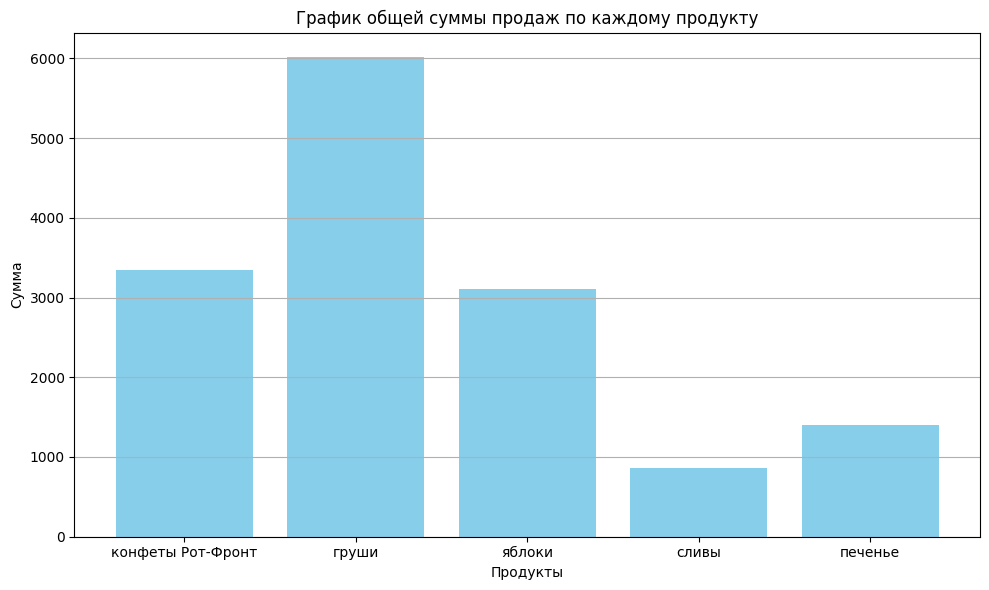

In [66]:
import matplotlib.pyplot as plt

# Исходные данные
"""
total_sales = { 'конфеты Рот-Фронт': 3342,
                'груши': 6022,
                'яблоки': 3102,
                'сливы': 862,
                'печенье': 1406}
"""

# Разделение данных на ключи и значения
products = list(total_sales.keys())
sums = list(total_sales.values())

# Построение графика
plt.figure(figsize=(10, 6))
plt.bar(products, sums, color='skyblue')
plt.xlabel('Продукты')
plt.ylabel('Сумма')
plt.title('График общей суммы продаж по каждому продукту')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Отображение графика
plt.tight_layout()
plt.show()

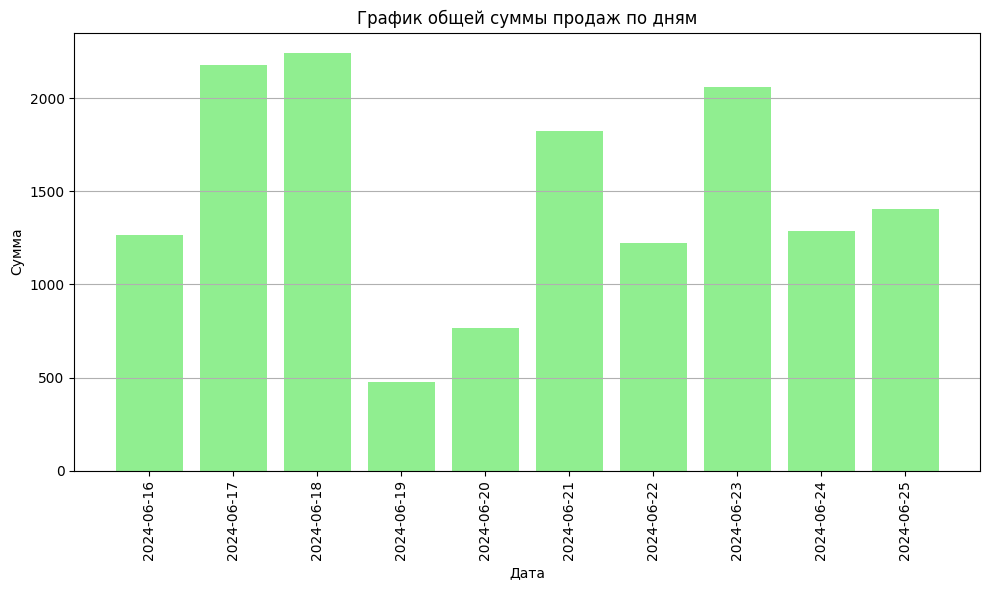

In [67]:
# Исходные данные
"""
sales_time = {'2024-06-22': 1225,
              '2024-06-17': 2180,
              '2024-06-18': 2241,
              '2024-06-16': 1267,
              '2024-06-20': 768,
              '2024-06-23': 2062,
              '2024-06-25': 1406,
              '2024-06-21': 1822,
              '2024-06-24': 1287,
              '2024-06-19': 476}
"""

# Сортировка по дате
sorted_res = sorted(sales_time.items())

"""
# Исходные данные
sorted_res = [('2024-06-16', 1267),
              ('2024-06-17', 2180),
              ('2024-06-18', 2241),
              ('2024-06-19', 476),
              ('2024-06-20', 768),
              ('2024-06-21', 1822),
              ('2024-06-22', 1225),
              ('2024-06-23', 2062),
              ('2024-06-24', 1287),
              ('2024-06-25', 1406)]
"""
# Разделение данных на дату и сумму
products = list(num[0] for num in sorted_res)
sums = list(num[1] for num in sorted_res)

# Построение графика
plt.figure(figsize=(10, 6))
plt.bar(products, sums, color='lightgreen')
plt.xlabel('Дата')
plt.ylabel('Сумма')
plt.title('График общей суммы продаж по дням')
plt.xticks(rotation=90)
plt.grid(axis='y')

# Отображение графика
plt.tight_layout()
plt.show()